### Cement Manufacturing Domain
Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate

#### Attribute Information:
- Cement : measured in kg in a m3 mixture
- Blast Furnace Slag : measured in kg in a m3 mixture
- Fly ash : measured in kg in a m3 mixture
- Water : measured in kg in a m3 mixture
- Superplasticizer : measured in kg in a m3 mixture
- Coarse Aggregate : measured in kg in a m3 mixture
- Fine Aggregate : measured in kg in a m3 mixture
- Age : day (1~365)
- Concrete compressive strength measured in MPa

#### Importing Standard Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### Reading the Data

In [2]:
df = pd.read_csv('concrete.csv')
ori_df = df.copy()
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


#### Name of the Variables and Shape of the Data

In [3]:
TARGET = "strength"
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [4]:
df.shape

(1030, 9)

## Exploratory Data Analysis

### Univariate Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

##### Observation
- The Dataset consists of 9 variables with 1030 rows
- All the column are Numerical column without any missing values
- Strength column is the Target variable.

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


##### Observations
- The columns with mean and median (50%) are almost similar signifies that they are normally distributed and their are no outliers present in these variables. The columns cement, water, superplastic, coarseagg, fineagg & strength seems to be normally distributed with muck skewness.
- Columns slag, ash & age indicates presence of high skewness hence these variables are very likely to have presence of outliers which needs to be treated before model processing.
- The columns slag, ash & superplastic has high number of ZERO values. More then 25% values are ZERO.

### Bivariate Analysis

In [8]:
#Method to show Distribution & Box plot for the variable along with skewness
def showPlots(df, col):
    fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
    fig.set_size_inches(12,4)
    sns.distplot(df[col], ax=ax1)
    ax1.set_title(f"{col} with skewness of {df[col].skew():.3f}")
    sns.boxplot(df[col], ax=ax2)
    ax2.set_title("Box Plot")

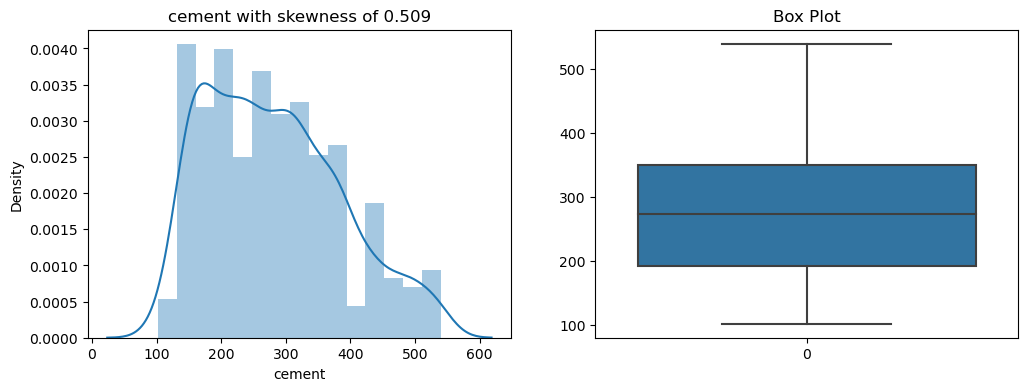

In [9]:
showPlots(df, 'cement')

##### Observation: cement attribute looks right skewed without presence of any outliers.

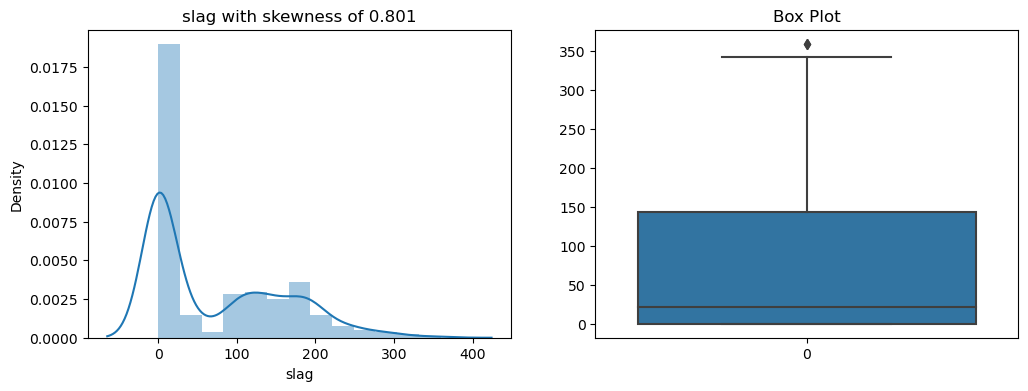

In [10]:
showPlots(df, 'slag')

##### Observation: slag attribute is right skewed with multiple guassian's & presence of outlier

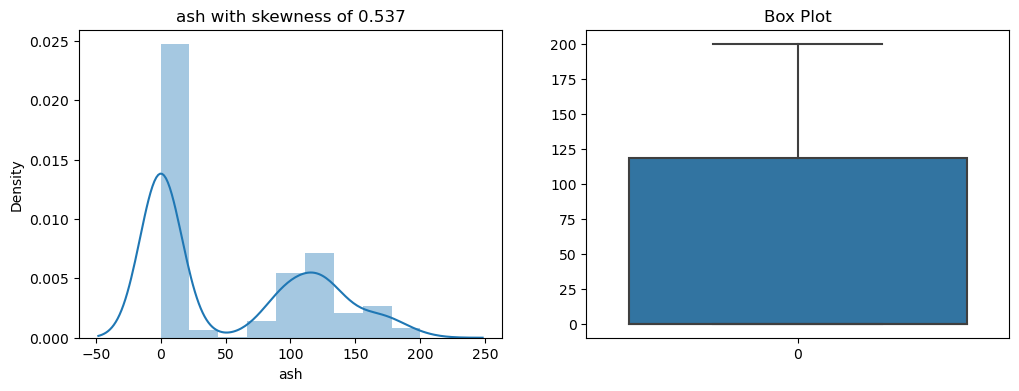

In [11]:
showPlots(df, 'ash')

##### Observation: ash attribute looks right skewed with multiple guassian's without presence of any outliers.

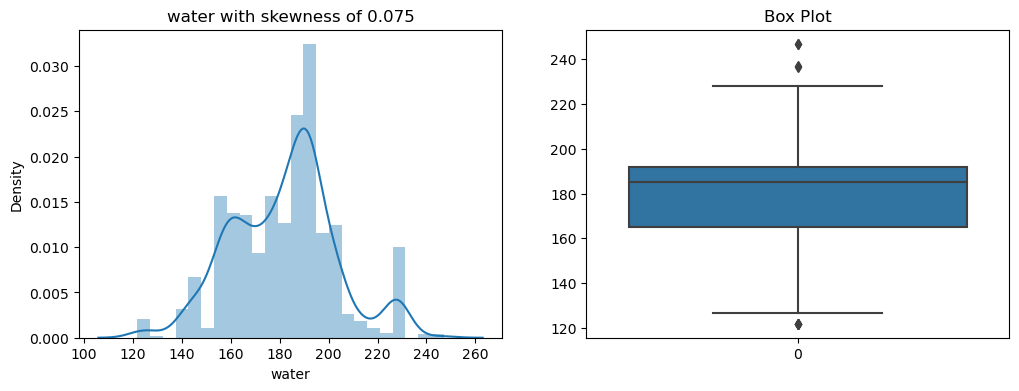

In [12]:
showPlots(df, 'water')

##### Observation: water seems normally distributed with multiple guassian's. It also has presence of outliers on both sides.

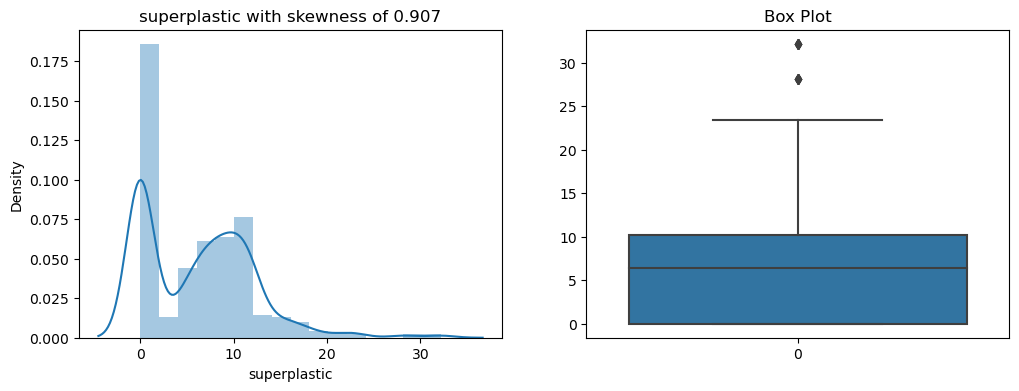

In [13]:
showPlots(df, 'superplastic')

##### Observation: superplastic column is right skewed with multiple guassian's & presence of outlier

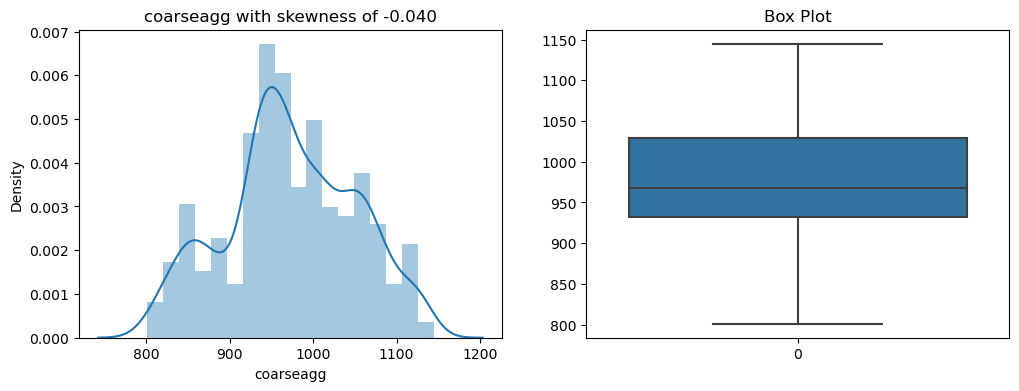

In [14]:
showPlots(df, 'coarseagg')

##### Observation: coarseagg seems normally distributed with multiple guassian's.

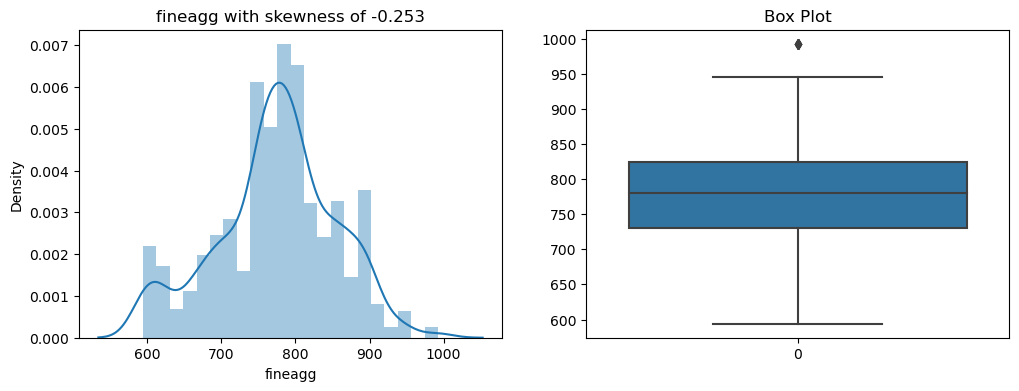

In [15]:
showPlots(df, 'fineagg')

##### Observation: fineagg seems normally distributed with multiple guassian's. It also has an outlier.

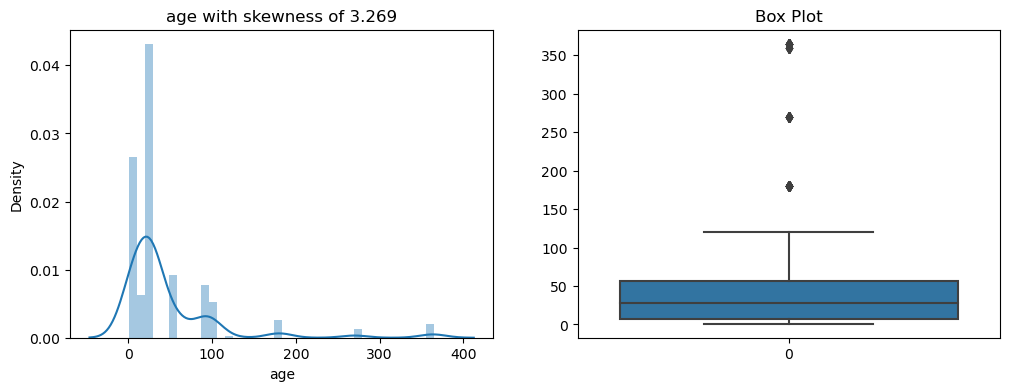

In [16]:
showPlots(df, 'age')

##### Observations: age column is right skewed with multiple guassian's & maximum presence of outliers

<Axes: >

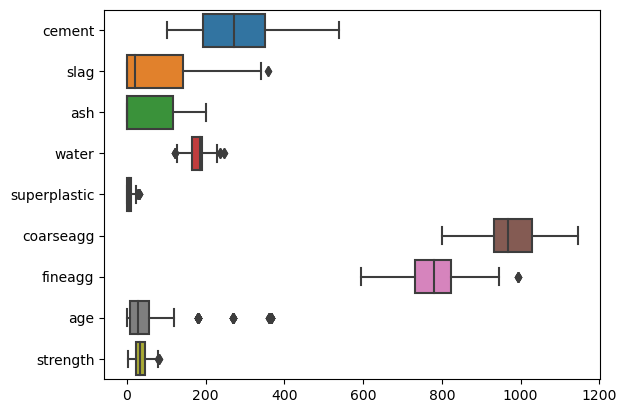

In [17]:
sns.boxplot(data = df, orient='h')

#### Summary:
From the above graphs, it can be seen that the columns slag, water, superplastic, fineagg & age has outliers. Therefore, we will treat outliers of these columns before proceeding further.

#### Outliers Treatment
We will replace the outliers with their respective Median value rather then deleting any row OR facing any loss of information

In [18]:
#We will handle the outliers using IQR
from scipy.stats import iqr

def handleOutliers(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df[col_name] = np.where(((df[col_name] < fence_low) | (df[col_name] > fence_high)), df[col_name].median(), df[col_name])
    return df[col_name]

In [19]:
# Define the columns having outliers & treat them
outliersCols = ["slag", "water", "superplastic", "fineagg", "age"]

for col in outliersCols:
    df[col] = handleOutliers(df, col)

<Axes: >

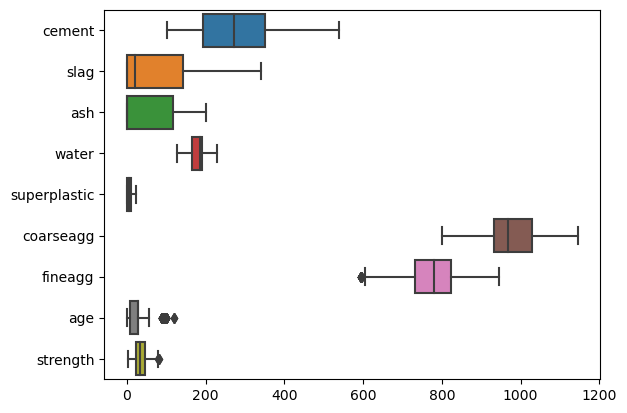

In [20]:
sns.boxplot(data = df, orient='h')

#### Target Column Distribution

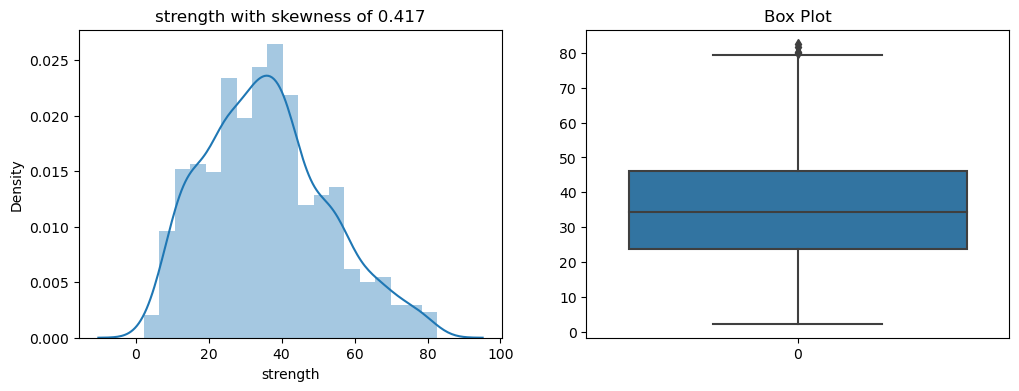

In [21]:
showPlots(df, TARGET)

##### Observation
- The Target column strength seems to be normally distributed.
- Visually a small tail can be noticed on the right side so the attribute is slightly right skewed.

### Multivariate Analysis

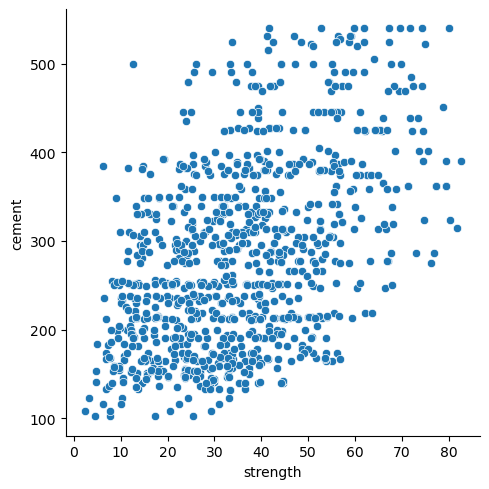

In [22]:
sns.relplot(x=TARGET, y="cement", kind="scatter", data=df)

##### Observation: Graph shows some positive linear relation but for a given value of cement we have multiple values of strength. Hence it is a weak predictor even though it has positive linear relationship.

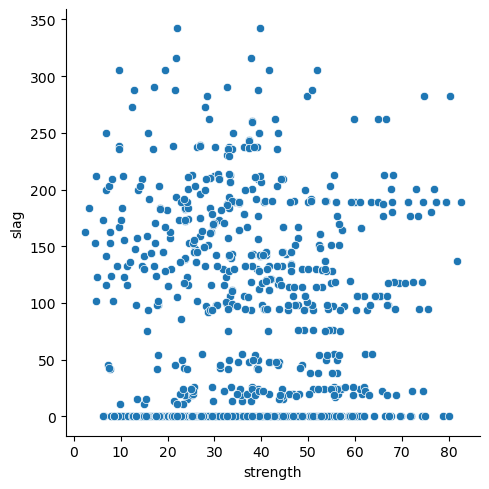

In [23]:
sns.relplot(x=TARGET, y="slag", kind="scatter", data=df)

##### Observation: Graph shows Weak relationship with no particular trend.

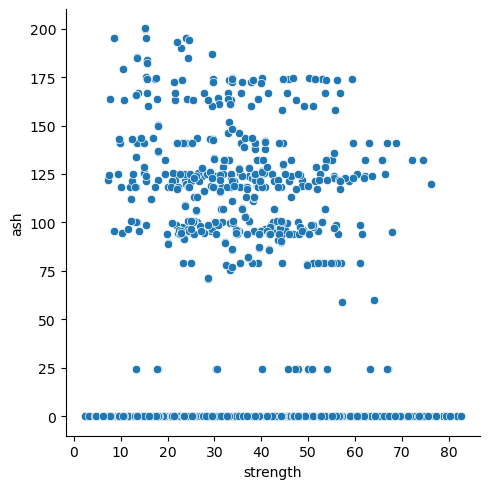

In [24]:
sns.relplot(x=TARGET, y="ash", kind="scatter", data=df);

##### Observation: Graph shows Weak relationship with no particular trend.

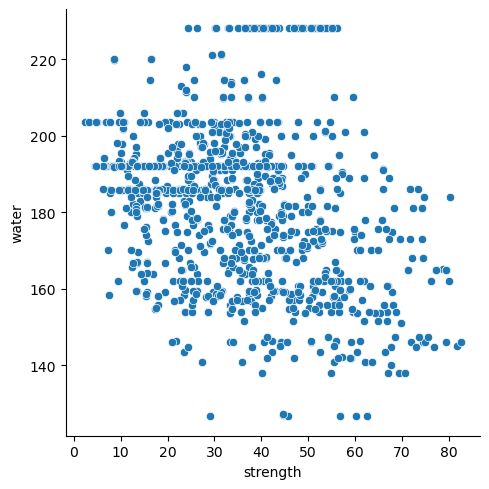

In [25]:
sns.relplot(x=TARGET, y="water", kind="scatter", data=df)

##### Observation: Graph shows some negative relationship but it is still a weak predictor.

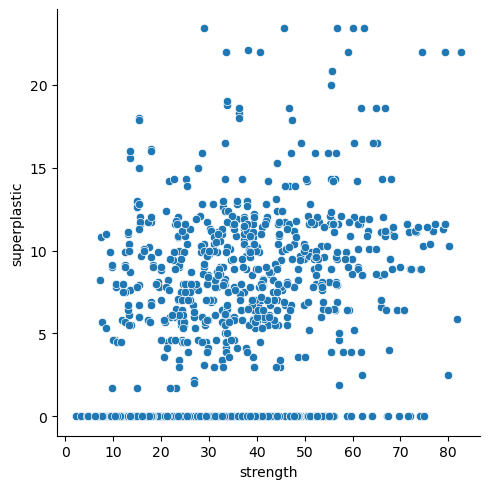

In [26]:
sns.relplot(x=TARGET, y="superplastic", kind="scatter", data=df)

##### Observation: Graph shows some positive relationship but it is still a weak predictor.

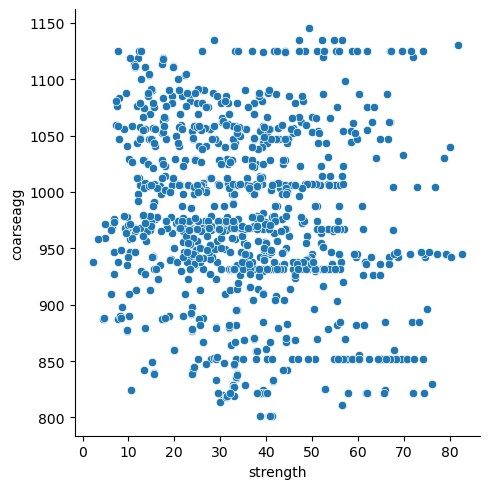

In [27]:
sns.relplot(x=TARGET, y="coarseagg", kind="scatter", data=df)

##### Observation: Graph shows Weak relationship with no particular trend.

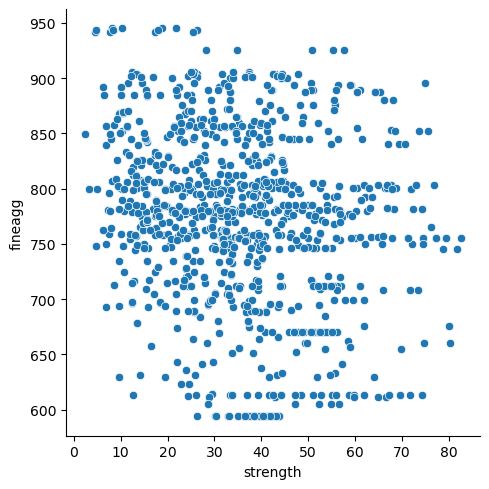

In [28]:
sns.relplot(x=TARGET, y="fineagg", kind="scatter", data=df)

##### Observation: Graph shows Weak relationship with no particular trend.

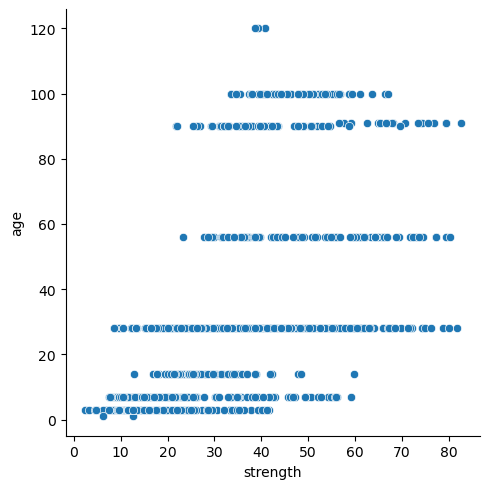

In [29]:
sns.relplot(x=TARGET, y="age", kind="scatter", data=df);

##### Observation: Graph shows minute positive linear relation but for a given value of age we have multiple values of strength. Hence it is also a weak predictor

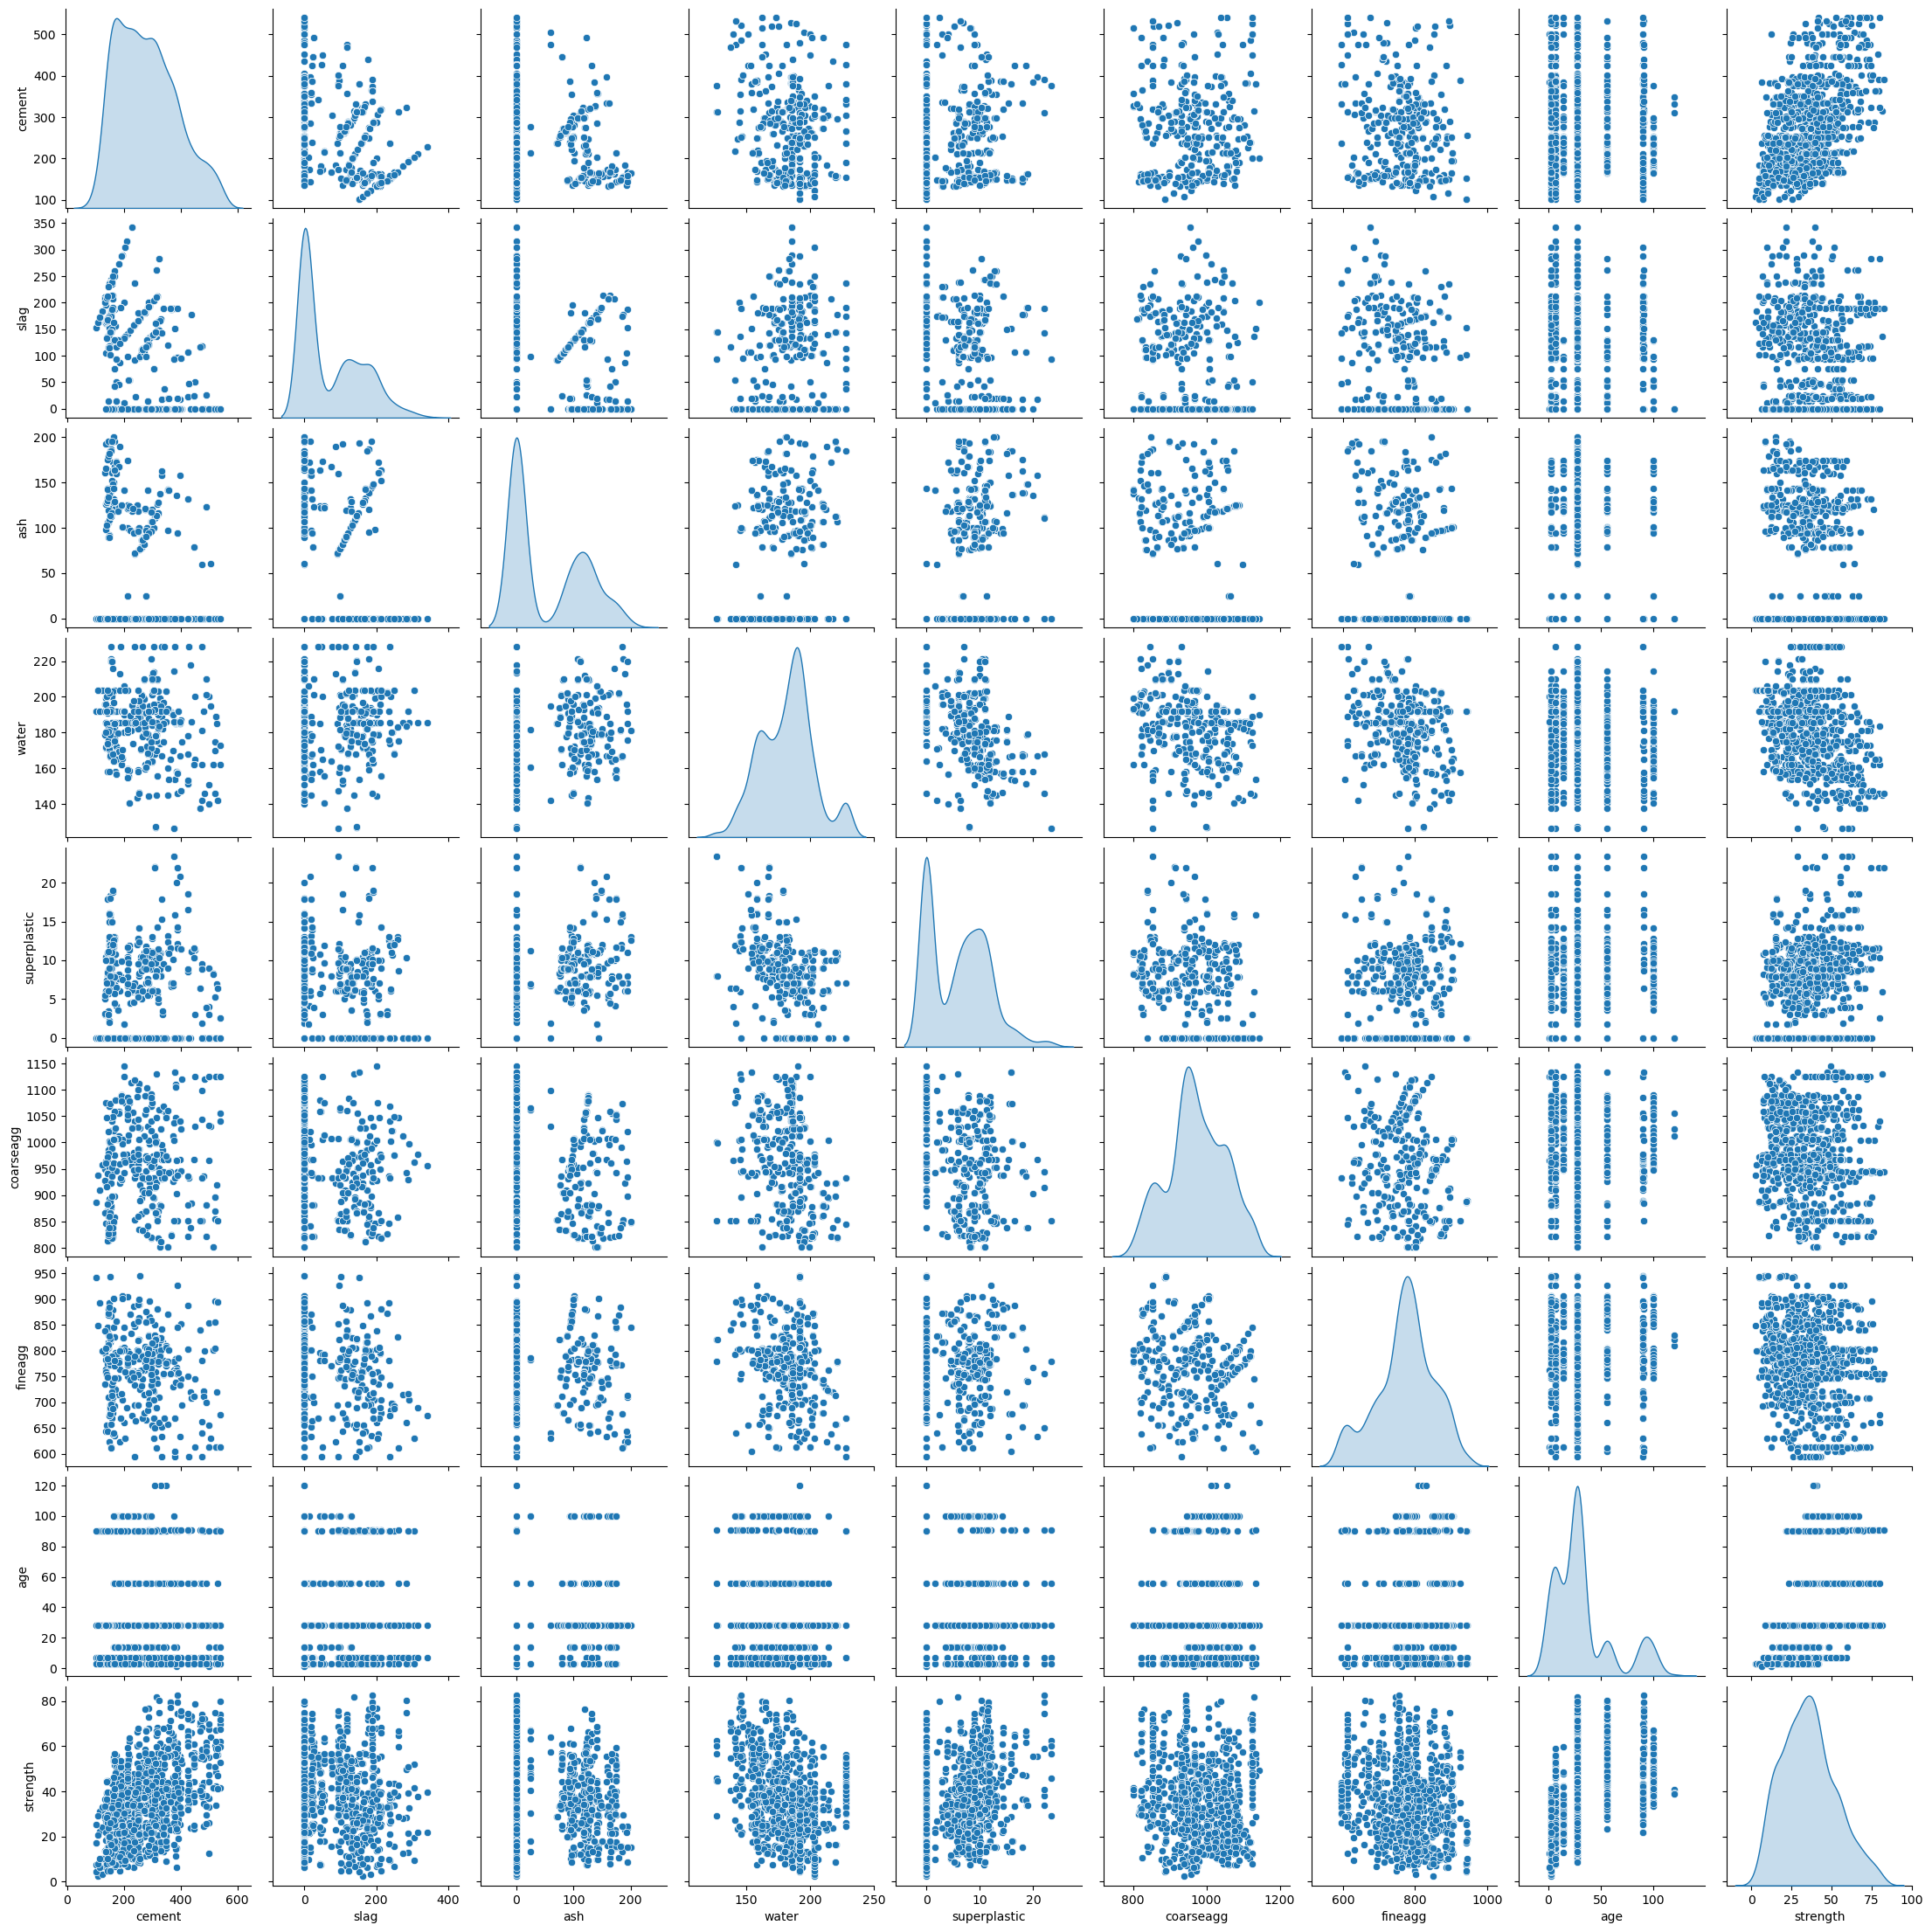

In [30]:
sns.pairplot(df, diag_kind='kde')

##### Inferences
- cement attribute have almost normal curve.
- slag has two gausssians and rightly skewed. It shows the presence of outliers.
- ash has two gaussians and rightly skewed. It shows the presence of outliers.
- water has atleast three guassians and slighly left skewed. It shows the presence of outliers.
- superplastic has multiple gaussians and rightly skewed. It shows the presence of outliers.
- coarseagg has three guassians and almost normal.
- fineagg has almost two guassians and looks like normal.
- age has multiple guassians and rightly skewed. It shows the presence of outliers.
- strength is close to a normal curve.

#### Correlation Comparison

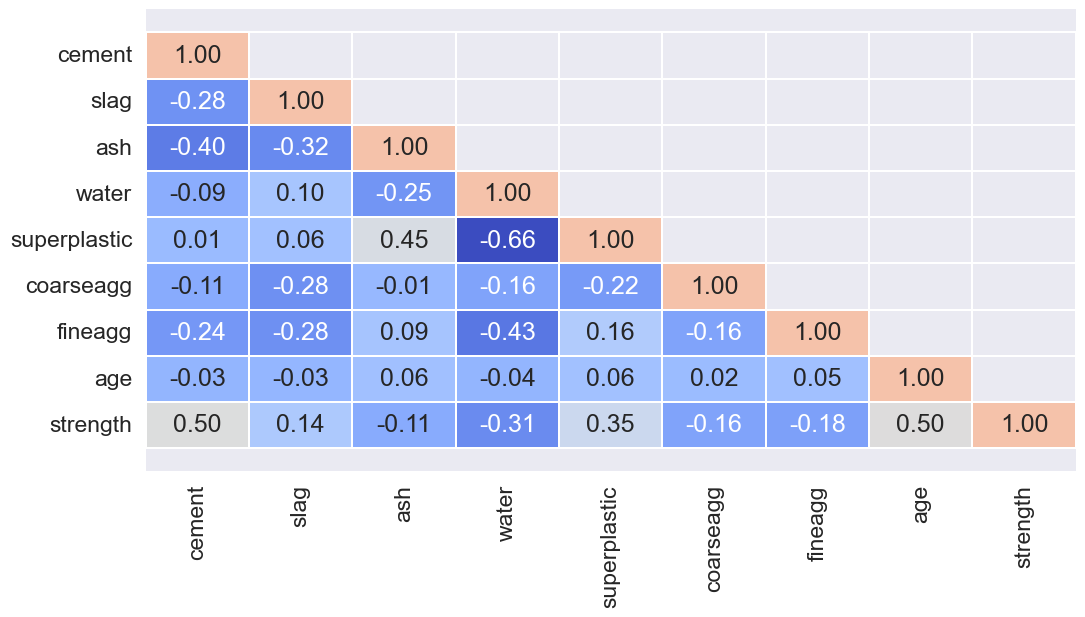

In [31]:
corr = df.corr()
# Highlighting only highly correlated features
# corr = corr[((corr >= 0.3) | (corr <= -0.3)) & (corr != 1)]
# select only the lower triangle of the correlation matrix
lower_triangle = np.tril(corr) 
# to mask the upper triangle in the following heatmap
mask = lower_triangle == 0  

plt.figure(figsize = (12,6))
sns.set(font_scale=1.5)
# Setting it to white so that we do not see the grid lines
sns.set_style(style = 'dark')  
sns.heatmap(lower_triangle, center=0.5, cmap= 'coolwarm', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, mask = mask, linecolor='white', vmax=.8, fmt='.2f',linewidths=0.01)

#Logic to manage the known issue with Matplotlib version 3.1.11 w.r.t. Heat Map
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()
sns.set(font_scale=1)

#### Observations: 
- cement has moderate positive correlation with strength, moderate negative correlation with ash & low correlation with slag & fineagg.
- slag has low negative correlation with ash, coarseagg & fineagg.
- ash has moderate positive correlation with superplastic & low negative correlation with water.
- water has moderate negative correlation with superplastic & fineagg and low with strength
- superplastic has moderate positive correlation with strength & low negative correlation with coarseagg
- age has moderate postive correlation with strength

#### Summary
- The Pair plot as well as the Correlation Comparison helps us to infer that there ais no significant correlation between any of the atributes. So, we can't drop any column straight away based on correlation results. 
- Also, none of the independent attributes individually are a good predictor of the target variable i.e. strength attribute. This indicates there is no linear relationship between the attributes

#### Storing the processed dataset

In [32]:
processed_df = df.copy()

## Model Building & Tuning

#### Import Libraries

In [33]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import RandomizedSearchCV

#### Model Execution Functions

In [34]:
SPLITS = 10
SPLIT_VALUE = 0.30
SEED = 1501
SCORING = 'r2'
MODEL = "Model Name"
TRAIN_SCORE = "Training Score"
TEST_SCORE = "Testing Score"
ACCURACY = "Accuracy/R2 score"
MSE = "Mean Squared Error"
KFOLD = "K Fold Cross Validation"
RANDOM_STATE = 41

# Function to set up results data frame for storing Polynomial feature results
def SetUpPolyResults():
    return pd.DataFrame(columns=[MODEL, TRAIN_SCORE, TEST_SCORE, ACCURACY, MSE])

# Function to set up results data frame for storing Model Building results
def SetUpResults():
    return pd.DataFrame(columns=[MODEL, TRAIN_SCORE, TEST_SCORE, ACCURACY, MSE, KFOLD])

# Function to split Target Variable from data
def SplitData(d):
    #Set of Independent Variables
    X=d.drop(TARGET, axis=1)
    #Dependent Variable
    y=d[TARGET]
    return X,y
    
# Function to Scale data
def ScaleData(X):
    scaler = StandardScaler()
    return scaler.fit_transform(X)

# Function to split data into training & test set
def SplitTrainTestSet(X, y):    
    Xtrain, Xtest, ytrain, ytest = train_test_split (X, y, test_size=SPLIT_VALUE, random_state=SEED)
    #print("Training Data Shape: {0}".format(Xtrain.shape))
    #print("Testing Data Shape: {0}".format(Xtest.shape))
    return Xtrain, Xtest, ytrain, ytest

# Function to Scale data
def PolynomialTransform(X, degree):
    poly = PolynomialFeatures( degree = degree, include_bias = False)
    data = poly.fit_transform(X)
    # summarize
    # print('Degree: %d, Features: %d' % (degree, data.shape[1]))
    return data

# Function to fit the model
def ModelFit (model, Xtr, ytr):
    fit = model.fit(Xtr, ytr)
    #print(fit)
    return model

# Function to predict from model
def ModelPredict (model, Xtt):
    return model.predict(Xtt)

# Function to print the Results of the model
def PrintResults(data, showGraph=True):  
    x = PrettyTable(list(data.columns))
    for row in data.itertuples():
        x.add_row(row[1:])     
    print(str(x))
    
    # Plottiong the graph of the results
    if showGraph:
        graphs = data.plot.bar(x=MODEL, subplots=True, figsize=(9, 12), legend=False)
        for ax in graphs:
            ax.bar_label(ax.containers[0])    

# Function to perform K-fold Cross Validation on the given model
def KFoldCrossValidation (model, X, y):
    kfold = model_selection.KFold(n_splits=SPLITS)
    results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring = SCORING)
    # print("CV Results:")
    # print(results)
    mean, std = results.mean(), results.std()
    return mean

# Function to get the feature importance & plot the graph
def FeatureImportance(mdl, columns):
    feats = {}
    for feature, importance in zip(columns, mdl.feature_importances_):
        feats[feature] = importance #add the name/value pair     
    importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Feature Importance'})
    importances.sort_values(by='Feature Importance').plot(kind='bar', rot=45, figsize=(5, 3))

#### Polynomial Feature Model Evaluation

In [35]:
# A single Function to execute all the steps for Model Evaluation
def ModelEvaluationPolyFeatures(d, name, model, degree = 0):
    # Splitting Original Data - Extract Target Column
    X, y = SplitData(d)
    
    # Creating Training & Test Set
    Xtrain, Xtest, ytrain, ytest = SplitTrainTestSet(X, y)
    
    if degree > 1:
        Xtrain = PolynomialTransform(Xtrain, degree)
        Xtest = PolynomialTransform(Xtest, degree)
    
    # Model Training/Fitting
    model = ModelFit(model, Xtrain, ytrain)
    
    # Get Model Prediction & Accuracy Score
    pred = ModelPredict(model, Xtest)
    
    global results
    results = results.append({
        MODEL: name,
        TRAIN_SCORE: round(model.score(Xtrain, ytrain) * 100, 2),
        TEST_SCORE: round(model.score(Xtest, ytest) * 100, 2),
        ACCURACY: round(r2_score(ytest, pred) * 100, 2),
        MSE: round(mean_squared_error(ytest, pred), 2),
    }, ignore_index=True)

### Feature Engineering - Polynomial Features + Regularization Techniques
Let us use the simple Linear regression, Ridge, Lasso & Elastic Net model to check whether a linear model or a higher degree transform will help. 

In [36]:
pipeLR = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

pipeR = make_pipeline(
    StandardScaler(),
    Ridge(random_state = RANDOM_STATE)
)

pipeL = make_pipeline(
    StandardScaler(),
    Lasso(random_state = RANDOM_STATE)
)

pipeEN = make_pipeline(
    StandardScaler(),
    ElasticNet(random_state = RANDOM_STATE)
)

+-----------------------+----------------+---------------+-------------------+--------------------+
|       Model Name      | Training Score | Testing Score | Accuracy/R2 score | Mean Squared Error |
+-----------------------+----------------+---------------+-------------------+--------------------+
|   Linear Degree = 1   |     71.63      |     70.95     |       70.95       |       86.42        |
|    Ridge Degree = 1   |     71.63      |     70.92     |       70.92       |       86.52        |
|    Lasso Degree = 1   |     68.88      |      67.2     |        67.2       |       97.57        |
| ElasticNet Degree = 1 |      60.9      |     58.83     |       58.83       |       122.47       |
|   Linear Degree = 2   |     85.73      |      84.6     |        84.6       |       45.81        |
|    Ridge Degree = 2   |     84.88      |     84.49     |       84.49       |       46.14        |
|    Lasso Degree = 2   |     70.91      |     69.71     |       69.71       |        90.1        |


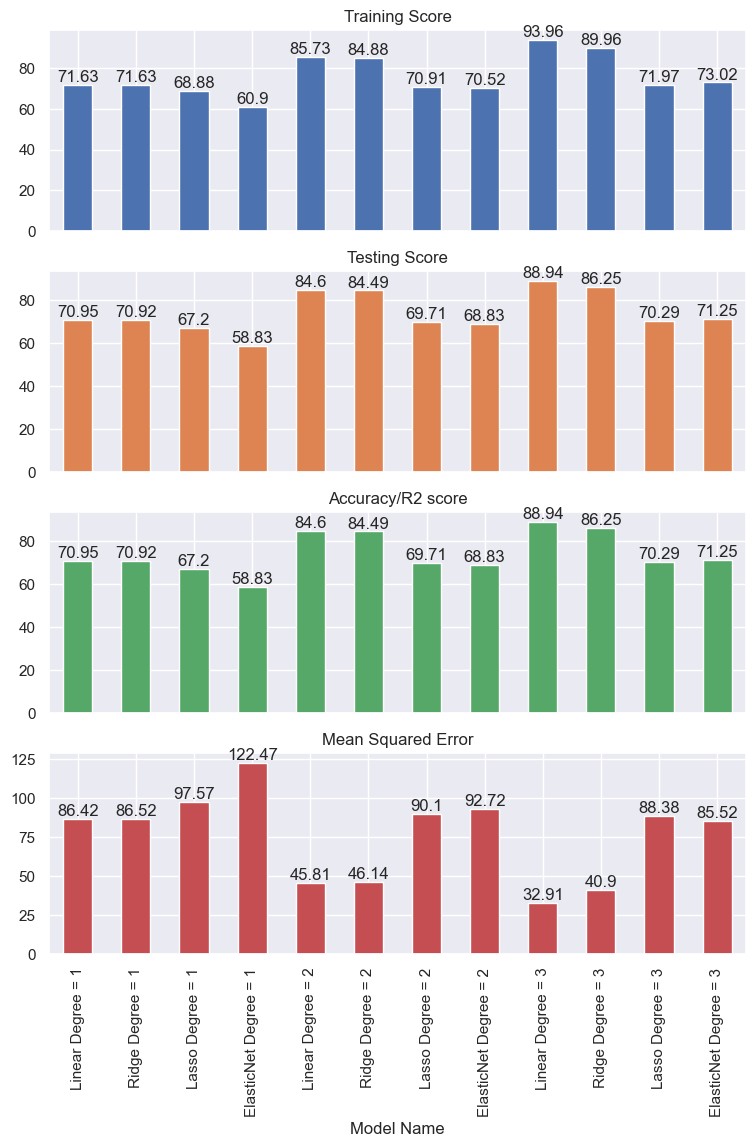

In [37]:
df = processed_df.copy()
results = SetUpPolyResults()

# Applying Polynomial Features with degree 2 & 3
for i in range(1,4):    
    deg = i
    ModelEvaluationPolyFeatures(df, "Linear Degree = " + str(deg), pipeLR, deg)
    ModelEvaluationPolyFeatures(df, "Ridge Degree = " + str(deg), pipeR, deg)
    ModelEvaluationPolyFeatures(df, "Lasso Degree = " + str(deg), pipeL, deg)
    ModelEvaluationPolyFeatures(df, "ElasticNet Degree = " + str(deg), pipeEN, deg)

PrintResults(results)

##### Observations:
- It was evident from the EDA that there doesn't exists any strong linear relationship of the independent attributes with the target variable hence linear model would not have faired that well.
- The table above shows that the accuracy OR score comes around 70% for all models when we consider the complexity as simple linear i.e. degree = 1
- But, when we move towards quadratic function (degree = 2) and towards cubic function (degree = 3) then we are able to see a sharp increase in the score of Linear Regression & Ridge model. Whereas Lasso & Elastic Net fares in a similar way as in a simple linear transform
- For Degree = 2, the rise is of around 14% that comes to more than 84% for both models
- For Degree = 3, the rise is of around 16% that comes to more then 86% for both models. Here, Linear regression performs exceedingly well with almost 89% score as compared to 71% when the complexity was simple linear
- To conclude, quadratic & cubic functions helps to improve the overall performance of the model

#### Model Evaluation Function

In [38]:
# A single Function to execute all the steps for Model Evaluation
def ModelEvaluation(d, name, model, tuning = 0, feature = 0):   
    # Splitting Original Data - Extract Target Column
    X, y = SplitData(d)

    # Creating Training & Test Set
    Xtrain, Xtest, ytrain, ytest = SplitTrainTestSet(X, y)
    
    # Standardize X Data
    Xtrain = ScaleData(Xtrain)
    Xtest = ScaleData(Xtest)
    
    # Model Training/Fitting
    model = ModelFit(model, Xtrain, ytrain) if tuning == 0 else model(Xtrain, ytrain)
    
    # Feature Importance of the model
    if feature == 1 :
        FeatureImportance(model, d.columns)
    
    # Get Model Prediction & Accuracy Score
    pred = ModelPredict(model, Xtest)
    
    # Perform Cross Validation
    mean = KFoldCrossValidation(model, X, y)
    
    global results
    results = results.append({
        MODEL: name,
        TRAIN_SCORE: round(model.score(Xtrain, ytrain) * 100, 2),
        TEST_SCORE: round(model.score(Xtest, ytest) * 100, 2),
        ACCURACY: round(r2_score(ytest, pred) * 100, 2),
        MSE: round(mean_squared_error(ytest, pred) * 100, 2),
        KFOLD: round(mean * 100, 2) if mean > 0 else 0
    }, ignore_index=True)

In [39]:
# Function to evaluate different regressors based on the data supplied
def EvaluateRegressors(data):
    global results
    results = SetUpResults()
    ModelEvaluation(data, 'SGD', SGDRegressor(random_state = RANDOM_STATE))
    ModelEvaluation(data, 'Decision Tree', DecisionTreeRegressor(random_state = RANDOM_STATE))
    ModelEvaluation(data, 'Random Forest', RandomForestRegressor(random_state = RANDOM_STATE))
    ModelEvaluation(data, 'Gradient Boosting', GradientBoostingRegressor(random_state = RANDOM_STATE))
    PrintResults(results)

#### Evaluate regressors on the original dataset

+-------------------+----------------+---------------+-------------------+--------------------+-------------------------+
|     Model Name    | Training Score | Testing Score | Accuracy/R2 score | Mean Squared Error | K Fold Cross Validation |
+-------------------+----------------+---------------+-------------------+--------------------+-------------------------+
|        SGD        |     71.58      |      71.0     |        71.0       |      8626.89       |            0            |
|   Decision Tree   |     99.48      |     75.64     |       75.64       |      7245.07       |          86.14          |
|   Random Forest   |      98.1      |     88.25     |       88.25       |      3496.43       |           90.9          |
| Gradient Boosting |      94.5      |     86.22     |       86.22       |      4099.01       |          89.94          |
+-------------------+----------------+---------------+-------------------+--------------------+-------------------------+


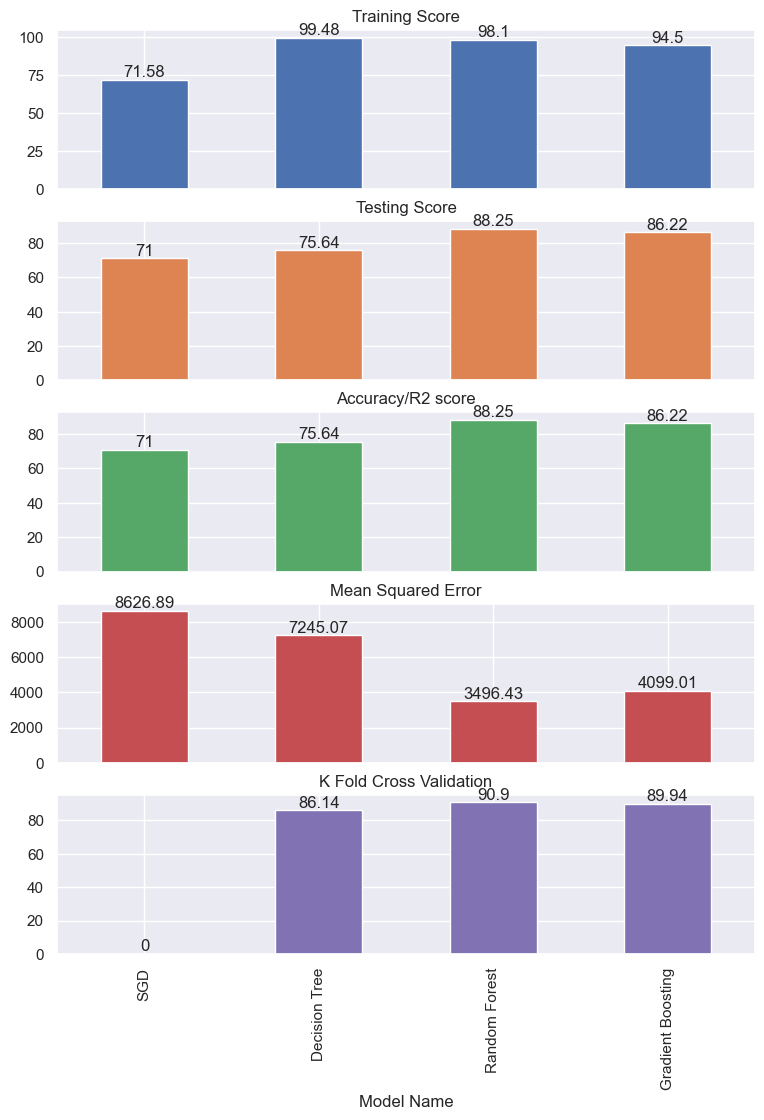

In [40]:
EvaluateRegressors(df)

### Feature Importance

+-------------------+----------------+---------------+-------------------+--------------------+-------------------------+
|     Model Name    | Training Score | Testing Score | Accuracy/R2 score | Mean Squared Error | K Fold Cross Validation |
+-------------------+----------------+---------------+-------------------+--------------------+-------------------------+
|        SGD        |     71.58      |      71.0     |        71.0       |      8626.89       |            0            |
|   Decision Tree   |     99.48      |     75.64     |       75.64       |      7245.07       |          86.14          |
|   Random Forest   |      98.1      |     88.25     |       88.25       |      3496.43       |           90.9          |
| Gradient Boosting |      94.5      |     86.22     |       86.22       |      4099.01       |          89.94          |
+-------------------+----------------+---------------+-------------------+--------------------+-------------------------+


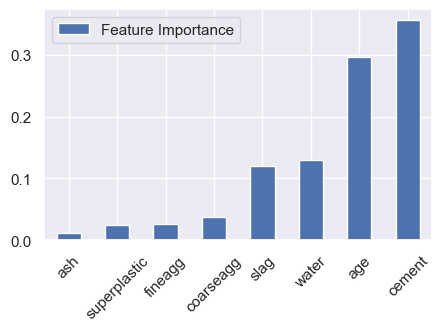

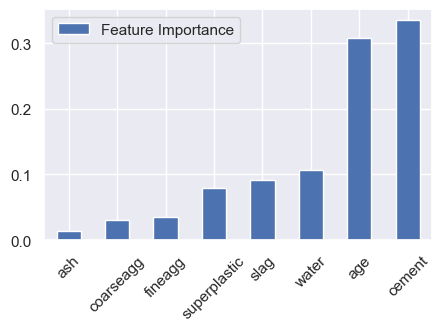

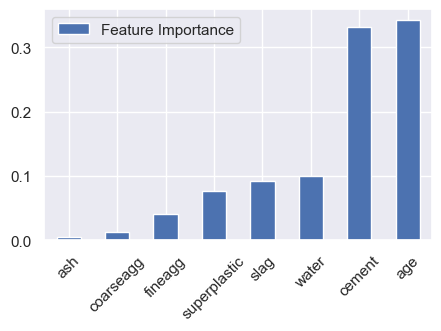

In [41]:
results = SetUpResults()
ModelEvaluation(df, 'SGD', SGDRegressor(random_state = RANDOM_STATE))
ModelEvaluation(df, 'Decision Tree', DecisionTreeRegressor(random_state = RANDOM_STATE), feature = 1)
ModelEvaluation(df, 'Random Forest', RandomForestRegressor(random_state = RANDOM_STATE), feature = 1)
ModelEvaluation(df, 'Gradient Boosting', GradientBoostingRegressor(random_state = RANDOM_STATE), feature = 1)
PrintResults(results, False)

##### Observations:
- As we have already inferred earlier
    - Feature cement, age, water, slag & superplastic together are important predictors of concrete strength
    - Feature ash, coarseagg & fineagg are weak predictors of concrete strength
- The above graphs of feature importances for both the models depicts the same inference. Only difference is here we have an added feature of clustergroup after performing K Means Clustering

#### Drop the Less Important feature

+-------------------+----------------+---------------+-------------------+--------------------+-------------------------+
|     Model Name    | Training Score | Testing Score | Accuracy/R2 score | Mean Squared Error | K Fold Cross Validation |
+-------------------+----------------+---------------+-------------------+--------------------+-------------------------+
|        SGD        |     70.54      |     68.54     |       68.54       |      9358.96       |            0            |
|   Decision Tree   |     99.48      |     78.05     |       78.05       |      6528.42       |          86.47          |
|   Random Forest   |     98.07      |     88.01     |       88.01       |      3567.46       |          90.59          |
| Gradient Boosting |     93.65      |     86.39     |       86.39       |      4047.67       |          89.11          |
+-------------------+----------------+---------------+-------------------+--------------------+-------------------------+


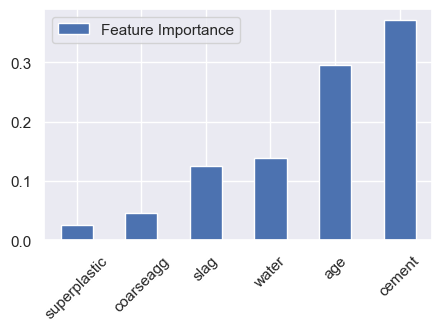

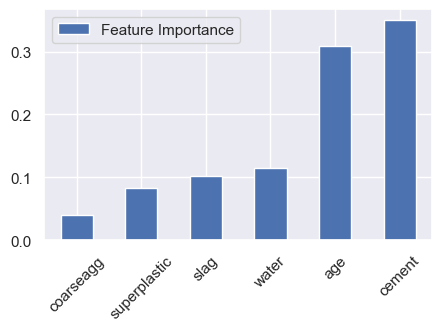

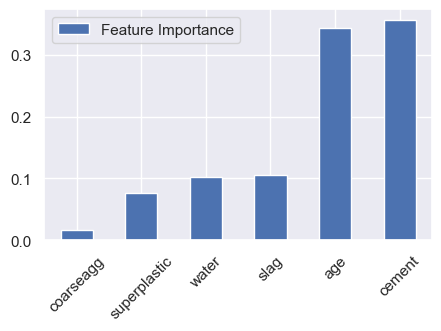

In [42]:
df_imp = df.drop(['ash', 'fineagg'], axis=1)
results = SetUpResults()
ModelEvaluation(df_imp, 'SGD', SGDRegressor(random_state = RANDOM_STATE))
ModelEvaluation(df_imp, 'Decision Tree', DecisionTreeRegressor(random_state = RANDOM_STATE), feature = 1)
ModelEvaluation(df_imp, 'Random Forest', RandomForestRegressor(random_state = RANDOM_STATE), feature = 1)
ModelEvaluation(df_imp, 'Gradient Boosting', GradientBoostingRegressor(random_state = RANDOM_STATE), feature = 1)
PrintResults(results, False)

##### Observations:
- After dropping the less important features there is an expected drop of around 2% in the overall score of the models
- The K Fold Cross Validation score also had minute drop < 1% as compared to the score with the original dataset
- Thus, dropping less important feature and reducing computation time can be a good way to take the model building forward.

### Hyper Tuning
We will hyper tune the models to squeeze out extra performance

#### Hyper Parameter Tuning Function

In [43]:
def SGDTuneHyperParams(Xtr, ytr):
    sgd = SGDRegressor(random_state = RANDOM_STATE)    
    loss = ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
    penalty = ['l1', 'l2', 'elasticnet']
    alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
    learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']
    eta0 = [0.01, 0.1, 1, 10, 100]
    
    param = dict(loss=loss, penalty=penalty, alpha=alpha, learning_rate=learning_rate, eta0=eta0)
    rs = RandomizedSearchCV(estimator = sgd, param_distributions = param, n_jobs = -1)
    rs.fit(Xtr, ytr)

    sgd_bestScore = rs.best_score_
    sgd_bestParam = rs.best_params_

    #Creating new model with best Parameters and running on the data again
    ls = sgd_bestParam['loss']
    pty = sgd_bestParam['penalty']
    a = sgd_bestParam['alpha']
    lr = sgd_bestParam['learning_rate']
    eta = sgd_bestParam['eta0']
    sgd = SGDRegressor(loss=ls, penalty=pty, alpha=a, learning_rate=lr, eta0=eta, random_state = RANDOM_STATE)
    sgd.fit(Xtr, ytr)
    return sgd

def DecisionTreeTuneHyperParams(Xtr, ytr):
    dt = DecisionTreeRegressor(random_state = RANDOM_STATE)    
    criterion = ['squared_error', 'absolute_error', 'friedman_mse']
    splitter = ['best', 'random']
    maxDepth = [1, 3, 5, 7, 9, 11]
    minLeaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    features = ['auto', 'log2', 'sqrt', None]
    maxNodes = [None, 10, 20, 30, 40, 50, 60, 70, 80, 90]
    
    param = dict(criterion = criterion, max_features = features, splitter = splitter, 
                 max_depth = maxDepth, max_leaf_nodes = maxNodes, min_samples_leaf = minLeaf)
    rs = RandomizedSearchCV(estimator = dt, param_distributions = param, n_jobs = -1)
    rs.fit(Xtr, ytr)

    dt_bestScore = rs.best_score_
    dt_bestParam = rs.best_params_

    #Creating new model with best Parameters and running on the data again
    s = dt_bestParam['splitter']
    md = dt_bestParam['max_depth']
    mln = dt_bestParam['max_leaf_nodes']
    msl = dt_bestParam['min_samples_leaf']
    cri = dt_bestParam['criterion']
    f = dt_bestParam['max_features']
    dt = DecisionTreeRegressor(criterion = cri, max_features = f, splitter = s, random_state = RANDOM_STATE,
                                max_depth = md, max_leaf_nodes = mln, min_samples_leaf = msl)
    dt.fit(Xtr, ytr)
    return dt

def RandomForestTuneHyperParams(Xtr, ytr):
    rf = RandomForestRegressor(random_state = RANDOM_STATE)
    est = list(range(50, 300, 50))
    minLeaf = list(range(2, 6))
    minSplit = [2, 3, 4, 5, 6]
    maxDepth = [None, 2, 3, 4, 5, 6, 7]
    criterion = ['squared_error', 'absolute_error', 'friedman_mse']
    features = ['auto', 'sqrt', 'log2']
    param = dict(criterion = criterion, max_features = features, n_estimators = est, 
                 max_depth = maxDepth, min_samples_split = minSplit, min_samples_leaf = minLeaf)
    rs = RandomizedSearchCV(estimator = rf, param_distributions = param, n_jobs = -1)
    rs.fit(Xtr, ytr)

    rf_bestScore = rs.best_score_
    rf_bestParam = rs.best_params_

    #Creating new model with best Parameters and running on the data again
    e = rf_bestParam['n_estimators']
    md = rf_bestParam['max_depth']
    mss = rf_bestParam['min_samples_split']
    msl = rf_bestParam['min_samples_leaf']
    cri = rf_bestParam['criterion']
    f = rf_bestParam['max_features']
    rf = RandomForestRegressor(criterion = cri, max_features = f, n_estimators = e, random_state = RANDOM_STATE,
                                max_depth = md, min_samples_split = mss, min_samples_leaf = msl)
    rf.fit(Xtr, ytr)
    return rf

def GradientBoostingTuneHyperParams(Xtr, ytr):
    gb = GradientBoostingRegressor(random_state = RANDOM_STATE)
    est = list(range(50, 300, 50))
    rate = [0.1, 0.2, 0.5]
    minLeaf = list(range(2, 6))
    minSplit = [2, 3, 4, 5]
    maxDepth = [None, 2, 3, 4, 5]
    criterion = ['squared_error', 'friedman_mse']
    loss = ['squared_error', 'absolute_error', 'huber', 'quantile']
    param = dict(criterion = criterion, loss = loss, n_estimators = est, learning_rate = rate,
                 max_depth = maxDepth, min_samples_split = minSplit, min_samples_leaf = minLeaf)
    gs = RandomizedSearchCV(gb, param, n_jobs = -1)
    gs.fit(Xtr, ytr)

    gb_bestScore = gs.best_score_
    gb_bestParam = gs.best_params_

    #Creating new model with best Parameters and running on the data again
    e = gb_bestParam['n_estimators']
    lr = gb_bestParam['learning_rate']
    md = gb_bestParam['max_depth']
    mss = gb_bestParam['min_samples_split']
    msl = gb_bestParam['min_samples_leaf']
    cri = gb_bestParam['criterion']
    l = gb_bestParam['loss']
    gb = GradientBoostingRegressor(criterion = cri, loss = l, n_estimators = e, learning_rate = lr, 
                                    max_depth = md, min_samples_split = mss, min_samples_leaf = msl,
                                  random_state = RANDOM_STATE)
    gb.fit(Xtr, ytr)
    return gb

#### Hyper tuned Model Evaluation

+-----------------------------+----------------+---------------+-------------------+--------------------+-------------------------+
|          Model Name         | Training Score | Testing Score | Accuracy/R2 score | Mean Squared Error | K Fold Cross Validation |
+-----------------------------+----------------+---------------+-------------------+--------------------+-------------------------+
|             SGD             |     71.63      |     71.19     |       71.19       |      8569.34       |            0            |
|        Decision Tree        |     79.05      |     73.36     |       73.36       |      7925.44       |          75.84          |
|        Random Forest        |     91.86      |      84.2     |        84.2       |      4701.19       |          86.32          |
|      Gradient Boosting      |     97.74      |     84.74     |       84.74       |      4538.73       |           92.5          |
|        SGD - Feature        |     70.02      |     68.12     |       68.12

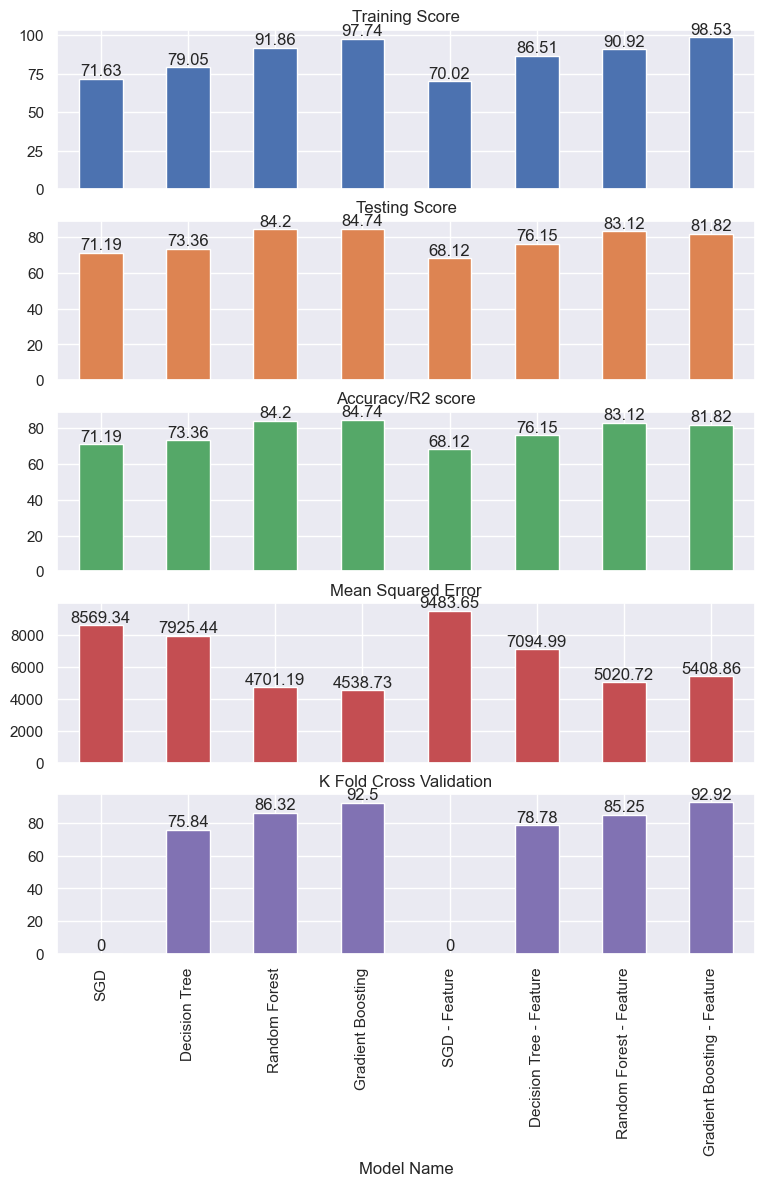

In [44]:
results = SetUpResults()
#Hyper tuning both models on dataset with composite feature of water to cement ratio
ModelEvaluation(df, 'SGD', SGDTuneHyperParams, tuning = 1)
ModelEvaluation(df, 'Decision Tree', DecisionTreeTuneHyperParams, tuning = 1)
ModelEvaluation(df, 'Random Forest', RandomForestTuneHyperParams, tuning = 1)
ModelEvaluation(df, 'Gradient Boosting', GradientBoostingTuneHyperParams, tuning = 1)

#Hyper tuning both models only on the dataset with important feature
ModelEvaluation(df_imp, 'SGD - Feature', SGDTuneHyperParams, tuning = 1)
ModelEvaluation(df_imp, 'Decision Tree - Feature', DecisionTreeTuneHyperParams, tuning = 1)
ModelEvaluation(df_imp, 'Random Forest - Feature', RandomForestTuneHyperParams, tuning = 1)
ModelEvaluation(df_imp, 'Gradient Boosting - Feature', GradientBoostingTuneHyperParams, tuning = 1)
PrintResults(results)

##### Observations
- After Hyper Tuning the Gradient Boosting Regressor has perfomed well with both K Means clustering dataset & after dropping least significant feature from that dataset.
- Gradient Boosting is a clear winner based on the scores shown after hyper tuning.